# PandaRoot Simulation Chain Plots

Plots of the **MC points**, **detector hits**, **track candidates** and **reconstructed tracks** in the tracking systems of the PANDA detector, created with the PandaRoot simulation chain.

## Python Imports

Import the required python packages

In [10]:
# python IO for ROOT files
import uproot

# numpy
import numpy as np

# For interactive plotting
import matplotlib.pyplot as plt
from matplotlib import patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib widget

# to get access to the pdg database 2024 version
import pdg
PdgApi = pdg.connect('sqlite:///../pdgall-2024-v0.1.0.sqlite')

## Global Settings

Get/set the paths to the input and output files.

Path to the root files with the data that should be plotted:

In [11]:
rootFilePath = "/home/n_idw/simFiles/root"

Path where the images should be saved

In [12]:
imagePath = "/mnt/c/Users/nikol/sciebo/Doktor/Pictures/simulation-visualization"

Name of the simulations (prefix) that should be plotted:

In [13]:
projectName = "mum5mup5"

## Particle Generation & Propagation

Plot how the generated particles propagate through the tracking systems.

### Import Parameters

Import the parameters corresponding to the properties of the generated particels and their propagation through the detectors, from the corresponding root file.

Simulation root file:

In [14]:
simFile = rootFilePath + "/" + projectName + "/" + projectName + "_sim.root"
print("Input simulation file: ",simFile)
mcPoint_params = uproot.open(simFile+":pndsim")

Input simulation file:  /home/n_idw/simFiles/root/mum5mup5/mum5mup5_sim.root


#### MC Track : `MCTrack`

| Parameter Name	| Description 											| Unit	| Type			|	 Class							|
|-------------------|-------------------------------------------------------|-------|---------------|-----------------------------------|
| UniqueID			| Object unique identifier								| -		| UInt_t		| TObject							|
| Bits				| Bit field status word									| -		| UInt_t		| TObject 							|
| PdgCode			|														|		| Int_t			| PndMCTrack						|
| P(x,y,z)			|														|		| Double32_t	| PndMCTrack						|
| E					|														|		| Double32_t	| PndMCTrack						|
| MotherID			|														|		| Int_t			| PndMCTrack						|
| SecondMotherID	|														|		| Int_t			| PndMCTrack						|
| GeneratorFlags	|														|		| Int_t			| PndMCTrack						|
| Start(X,Y,Z)		|														|		| Double32_t	| PndMCTrack						|
| StartT			|														|		| Double32_t	| PndMCTrack						|
| Points			|														|		| Int_t			| PndMCTrack						|
| Process			|														|		| UInt_t		| PndMCTrack						|

#### Straw Tube Detector (STT) : `STTPoint`

pos and mom are given in x, y, and z coordinates in the lab frame

| Parameter Name	| Description 											| Unit	| Type			|	 Class							|
|-------------------|-------------------------------------------------------|-------|---------------|-----------------------------------|
| UniqueID			| Object unique identifier								| -		| UInt_t		| TObject							|
| Bits				| Bit field status word									| -		| UInt_t		| TObject 							|
| Link				| 														| -		| unique_ptr	| FairMultiLinkedData_Interface		|
| TrackID			| Track index											| -		| Int_t			| FairMCPoint						|
| EventId			| MC Event id											| -		| UInt_t		| FairMCPoint						|
| P(x,y,z)			| Momentum components									| GeV	| Double32_t	| FairMCPoint						|
| Time				| Time since event start								| ns	| Double32_t	| FairMCPoint						|
| Length			| Track length since creation							| cm	| Double32_t	| FairMCPoint						|
| ELoss				| Energy loss at this point								| GeV	| Double32_t	| FairMCPoint						|
| DetectorID		| Detector unique identifier 							| -		| Int_t			| FairMCPoint						|
| (X,Y,Z)			| Position of hit 										| cm	| Double32_t	| FairMCPoint						|
| (X,Y,Z)_out_local	| Exit coordinates in straw frame						|		| Double_t		| PndSttPoint						|
| (X,Y,Z)_in_local	| Entry coordinates in straw frame						|		| Double_t		| PndSttPoint						|
| P(x,y,z)_in		| *unused member*										|		| Double_t		| PndSttPoint						|
| P(x,y,z)_out		| 														|		| Double_t		| PndSttPoint						|
| Mass				| Particle mass											|		| Double_t		| PndSttPoint						|
| TubeID			| Tube ID												|		| Int_t			| PndSttPoint						|

#### Micro Vertex Detector (MVD) : `MVDPoint`

pos and mom are given in x, y, and z coordinates in the lab frame

| Parameter Name	| Description 											| Unit	| Type			|	 Class							|
|-------------------|-------------------------------------------------------|-------|---------------|-----------------------------------|
| UniqueID			| Object unique identifier								| -		| UInt_t		| TObject							|
| Bits				| Bit field status word									| -		| UInt_t		| TObject 							|
| Link				| 														| -		| unique_ptr	| FairMultiLinkedData_Interface		|
| TrackID			| Track index											| -		| Int_t			| FairMCPoint						|
| EventId			| MC Event id											| -		| UInt_t		| FairMCPoint						|
| P(x,y,z)			| Momentum components									| GeV	| Double32_t	| FairMCPoint						|
| Time				| Time since event start								| ns	| Double32_t	| FairMCPoint						|
| Length			| Track length since creation							| cm	| Double32_t	| FairMCPoint						|
| ELoss				| Energy loss at this point								| GeV	| Double32_t	| FairMCPoint						|
| DetectorID		| Detector unique identifier 							| -		| Int_t			| FairMCPoint						|
| (X,Y,Z)			| Position of hit 										| cm	| Double32_t	| FairMCPoint						|
| (X,Y,Z)Out		| 														|		| Double32_t	| PndMCPoint						|
| P(x,y,z)Out		| 														|		| Double32_t	| PndMCPoint						|
| SensorID			| 														|		| Int_t			| PndSdsMCPoint 					|

### Plots

Give the event number that should be plotted:

In [15]:
eventNumer = 0

#### xy-projection with z-position indicated by color

Min z:  -37.369384765625  cm
Max z:  108.4334487915039  cm
Saving png image to:  /mnt/c/Users/nikol/sciebo/Doktor/Pictures/simulation-visualization/sim/mum5mup5_xyProjection.png
Saving pdf image to:  /mnt/c/Users/nikol/sciebo/Doktor/Pictures/simulation-visualization/sim/mum5mup5_xyProjection.pdf


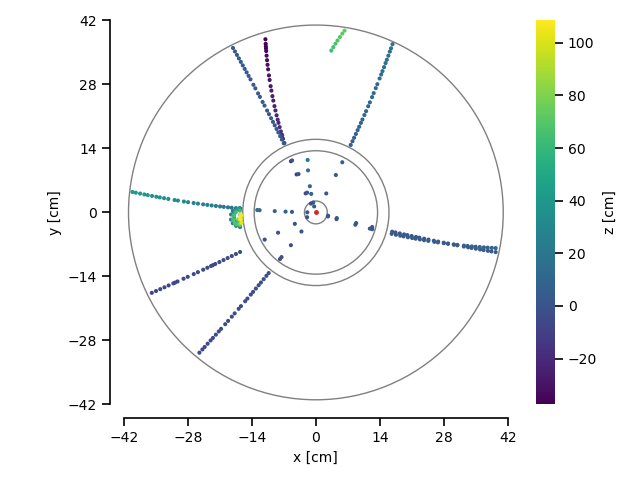

In [16]:
plt.close()
eventNumber = 0

# get x,y & z coordinates of the STT & MVD MC points
stt_x = mcPoint_params["STTPoint.fX"].array(library="np")[eventNumber]
stt_y = mcPoint_params["STTPoint.fY"].array(library="np")[eventNumber]
stt_z = mcPoint_params["STTPoint.fZ"].array(library="np")[eventNumber]

mvd_x = mcPoint_params["MVDPoint.fX"].array(library="np")[eventNumber]
mvd_y = mcPoint_params["MVDPoint.fY"].array(library="np")[eventNumber]
mvd_z = mcPoint_params["MVDPoint.fZ"].array(library="np")[eventNumber]

# find out what the maximum and minimum z values are
z_coords = np.concatenate((stt_z, mvd_z))
min_z = np.min(z_coords)
print("Min z: ", np.min(z_coords), " cm")
max_z = np.max(z_coords)
print("Max z: ", np.max(z_coords), " cm")

fig = plt.figure()
ax = fig.add_subplot()

# Plot the IP
plt.plot(0,0,marker='.',ms=5, color='tab:red')

# Plot the inner and outer MVD radii
mvdInner = patches.Circle((0,0), radius=2.5, color='gray', fill=False)
ax.add_patch(mvdInner)

mvdOuter = patches.Circle((0,0), radius=13.5, color='gray', fill=False)
ax.add_patch(mvdOuter)


# Plot the inner and outer STT radii
sttInner = patches.Circle((0,0), radius=16.0, color='gray', fill=False)
ax.add_patch(sttInner)

sstOuter = patches.Circle((0,0), radius=41.0, color='gray', fill=False)
ax.add_patch(sstOuter)

# plot the STT & MVD MC points as dots with the color representing the z coordinate
plt.scatter(stt_x, stt_y, c=stt_z, cmap='viridis', marker='.',s=15, vmin=min_z, vmax=max_z)
plt.scatter(mvd_x, mvd_y, c=mvd_z, cmap='viridis', marker='.',s=15, vmin=min_z, vmax=max_z)

# Set the axis labels and limits
plt.xlabel("x [cm]")
plt.xlim(-42, 42)
plt.ylabel("y [cm]")
plt.ylim(-42, 42)

# Set the ticks positions to match the data range
x_ticks = np.linspace(-42, 42, num=7)
y_ticks = np.linspace(-42, 42, num=7)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.tick_params(length=6,width=1.2)

# Set the aspect ratio to be equal
plt.gca().set_aspect('equal')

# Add and format the color bar 
cbar = plt.colorbar(label="z [cm]")
cbar.outline.set_visible(False)
cbar.ax.yaxis.set_tick_params(length=6,width=1.2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

fig.tight_layout()	

imgPath = imagePath + "/sim/" + projectName + "_xyProjection"

print("Saving png image to: ", imgPath+".png")
plt.savefig(imgPath+".png", dpi=300, bbox_inches='tight')

print("Saving pdf image to: ", imgPath+".pdf")
plt.savefig(imgPath+".pdf", dpi=300, bbox_inches='tight')

#### xz-projection with the y-position indicated with color

Min y:  -30.69289207458496  cm
Max y:  39.77885818481445  cm
Saving png image to:  /mnt/c/Users/nikol/sciebo/Doktor/Pictures/simulation-visualization/sim/mum5mup5_xzProjection.png
Saving pdf image to:  /mnt/c/Users/nikol/sciebo/Doktor/Pictures/simulation-visualization/sim/mum5mup5_xzProjection.pdf


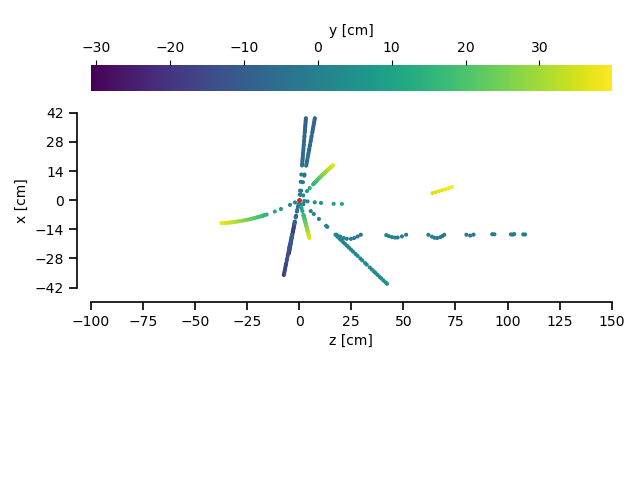

No such comm: 5527f1997dad4260b01a918e4f63403a


In [17]:
plt.close()
eventNumber = 0

# get x,y & z coordinates of the STT & MVD MC points
stt_x = mcPoint_params["STTPoint.fX"].array(library="np")[eventNumber]
stt_y = mcPoint_params["STTPoint.fY"].array(library="np")[eventNumber]
stt_z = mcPoint_params["STTPoint.fZ"].array(library="np")[eventNumber]

mvd_x = mcPoint_params["MVDPoint.fX"].array(library="np")[eventNumber]
mvd_y = mcPoint_params["MVDPoint.fY"].array(library="np")[eventNumber]
mvd_z = mcPoint_params["MVDPoint.fZ"].array(library="np")[eventNumber]

# find out what the maximum and minimum y values are
y_coords = np.concatenate((stt_y, mvd_y))
min_y = np.min(y_coords)
print("Min y: ", np.min(y_coords), " cm")
max_y = np.max(y_coords)
print("Max y: ", np.max(y_coords), " cm")

fig = plt.figure()
ax = fig.add_subplot()

# Plot the IP
plt.plot(0,0,marker='.',ms=5, color='tab:red')

# plot the x and z coordinates of hte STT & MVD MC points as dots with the color representing the y coordinate
plt.scatter(stt_z, stt_x, c=stt_y, cmap='viridis', marker='.',s=15, vmin=min_y, vmax=max_y)
plt.scatter(mvd_z, mvd_x, c=mvd_y, cmap='viridis', marker='.',s=15, vmin=min_y, vmax=max_y)

# Set the axis labels and limits
plt.xlabel("z [cm]")
plt.xlim(-100, 150)
plt.ylabel("x [cm]")
plt.ylim(-42, 42)

# Set the ticks positions to match the data range
x_ticks = np.linspace(-100, 150, num=11)
y_ticks = np.linspace(-42, 42, num=7)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.tick_params(length=6,width=1.2)

# Make the axis look fancier
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

# Add and format the color bar
cbar = plt.colorbar(label="y [cm]",orientation='horizontal',location="top")
cbar.outline.set_visible(False)
cbar.ax.yaxis.set_tick_params(length=6,width=1.2)

# Set the aspect ratio to be equal
ax.set_aspect('equal')

fig.tight_layout()

imgPath = imagePath + "/sim/" + projectName + "_xzProjection"

print("Saving png image to: ", imgPath+".png")
plt.savefig(imgPath+".png", dpi=300, bbox_inches='tight')

print("Saving pdf image to: ", imgPath+".pdf")
plt.savefig(imgPath+".pdf", dpi=300, bbox_inches='tight')

#### yz-projection with color indicating the x-position

Min x:  -40.1405143737793  cm
Max x:  39.34862518310547  cm
Saving png image to:  /mnt/c/Users/nikol/sciebo/Doktor/Pictures/simulation-visualization/sim/mum5mup5_yzProjection.png
Saving pdf image to:  /mnt/c/Users/nikol/sciebo/Doktor/Pictures/simulation-visualization/sim/mum5mup5_yzProjection.pdf


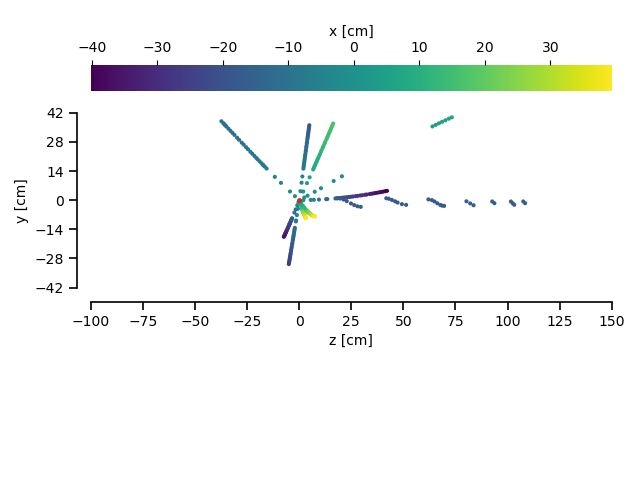

In [19]:
plt.close()
eventNumber = 0

# get x,y & z coordinates of the STT & MVD MC points
stt_x = mcPoint_params["STTPoint.fX"].array(library="np")[eventNumber]
stt_y = mcPoint_params["STTPoint.fY"].array(library="np")[eventNumber]
stt_z = mcPoint_params["STTPoint.fZ"].array(library="np")[eventNumber]

mvd_x = mcPoint_params["MVDPoint.fX"].array(library="np")[eventNumber]
mvd_y = mcPoint_params["MVDPoint.fY"].array(library="np")[eventNumber]
mvd_z = mcPoint_params["MVDPoint.fZ"].array(library="np")[eventNumber]

# find out what the maximum and minimum y values are
x_coords = np.concatenate((stt_x, mvd_x))
min_x = np.min(x_coords)
print("Min x: ", np.min(x_coords), " cm")
max_x = np.max(x_coords)
print("Max x: ", np.max(x_coords), " cm")

fig = plt.figure()
ax = fig.add_subplot()

# Plot the IP
plt.plot(0,0,marker='.',ms=5, color='tab:red')

# plot the y and z coordinates of hte STT & MVD MC points as dots with the color representing the x coordinate
plt.scatter(stt_z, stt_y, c=stt_x, cmap='viridis', marker='.',s=15, vmin=min_x, vmax=max_x)
plt.scatter(mvd_z, mvd_y, c=mvd_x, cmap='viridis', marker='.',s=15, vmin=min_x, vmax=max_x)

# Set the axis labels and limits
plt.xlabel("z [cm]")
plt.xlim(-100, 150)
plt.ylabel("y [cm]")
plt.ylim(-42, 42)

# Set the ticks positions to match the data range
x_ticks = np.linspace(-100, 150, num=11)
y_ticks = np.linspace(-42, 42, num=7)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.tick_params(length=6,width=1.2)

# Make the axis look fancier
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

# Add and format the color bar
cbar = plt.colorbar(label="x [cm]",orientation='horizontal',location="top")
cbar.outline.set_visible(False)
cbar.ax.yaxis.set_tick_params(length=6,width=1.2)

# Set the aspect ratio to be equal
ax.set_aspect('equal')

fig.tight_layout()

imgPath = imagePath + "/sim/" + projectName + "_yzProjection"

print("Saving png image to: ", imgPath+".png")
plt.savefig(imgPath+".png", dpi=300, bbox_inches='tight')

print("Saving pdf image to: ", imgPath+".pdf")
plt.savefig(imgPath+".pdf", dpi=300, bbox_inches='tight')

#### xy-projection with different colors for different tracks

Saving png image to:  /mnt/c/Users/nikol/sciebo/Doktor/Pictures/simulation-visualization/sim/mum5mup5_xyTracks.png
Saving pdf image to:  /mnt/c/Users/nikol/sciebo/Doktor/Pictures/simulation-visualization/sim/mum5mup5_xyTracks.pdf


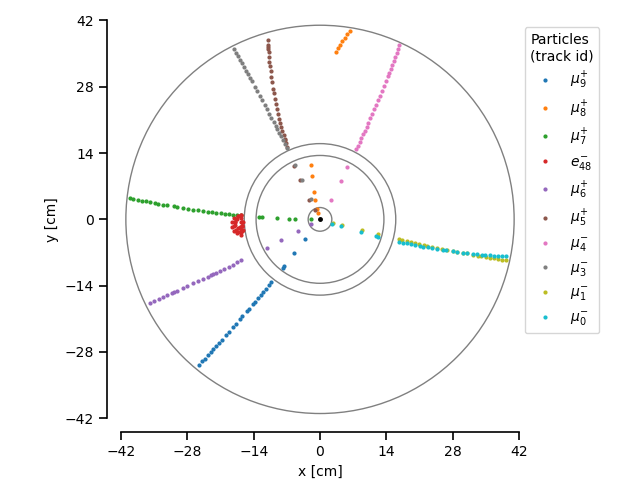

In [61]:
plt.close()

eventNumber = 0

# get the PDG IDs of the MCTracks
mcTrack_pdgId = mcPoint_params["MCTrack.fPdgCode"].array(library="np")[eventNumber]

# get x,y & z coordinates of the STT & MVD MC points
stt_x = mcPoint_params["STTPoint.fX"].array(library="np")[eventNumber]
stt_y = mcPoint_params["STTPoint.fY"].array(library="np")[eventNumber]
stt_trackIDs = mcPoint_params["STTPoint.fTrackID"].array(library="np")[eventNumber]

mvd_x = mcPoint_params["MVDPoint.fX"].array(library="np")[eventNumber]
mvd_y = mcPoint_params["MVDPoint.fY"].array(library="np")[eventNumber]
mvd_trackIDs = mcPoint_params["MVDPoint.fTrackID"].array(library="np")[eventNumber]

# define dictionaries with the trackID as the key and arrays with x and y coordinates as the values
xPointsPerTrack = {}
yPointsPerTrack = {}

# Iterate over all track IDs in the STT volume
point = 0
for trackID in stt_trackIDs:
	if trackID not in xPointsPerTrack:
		xPointsPerTrack[trackID] = []
		yPointsPerTrack[trackID] = []
	xPointsPerTrack[trackID].append(stt_x[point])
	yPointsPerTrack[trackID].append(stt_y[point])
	point += 1

# Iterate over all track IDs in the MVD volume
point = 0
for trackID in mvd_trackIDs:
	if trackID not in xPointsPerTrack:
		xPointsPerTrack[trackID] = []
		yPointsPerTrack[trackID] = []
	xPointsPerTrack[trackID].append(mvd_x[point])
	yPointsPerTrack[trackID].append(mvd_y[point])
	point += 1

fig = plt.figure()
ax = fig.add_subplot()

# Plot the IP
plt.plot(0,0,marker='.',ms=5, color='black')

# Plot the inner and outer MVD radii
mvdInner = patches.Circle((0,0), radius=2.50, color='gray', fill=False)
ax.add_patch(mvdInner)
mvdOuter = patches.Circle((0,0), radius=13.5, color='gray', fill=False)
ax.add_patch(mvdOuter)

# Plot the inner and outer STT radii
sttInner = patches.Circle((0,0), radius=16.0, color='gray', fill=False)
ax.add_patch(sttInner)
sstOuter = patches.Circle((0,0), radius=41.0, color='gray', fill=False)
ax.add_patch(sstOuter)

for trackID in xPointsPerTrack:
	if mcTrack_pdgId[trackID] == 13:
		trackLabel = r'$\mu^{-}_{'+ str(trackID) +r'}$'
	elif mcTrack_pdgId[trackID] == -13:
		trackLabel = r'$\mu^{+}_{'+ str(trackID) +r'}$'
	elif mcTrack_pdgId[trackID] == 11:
		trackLabel = r'$e^{-}_{'+ str(trackID) +r'}$'
	elif mcTrack_pdgId[trackID] == -11:
		trackLabel = r'$e^{+}_{'+ str(trackID) +r'}$'
	else:
		trackLabel = "PDG ID: " + str(mcTrack_pdgId[trackID])
	plt.plot(xPointsPerTrack[trackID],yPointsPerTrack[trackID],marker='.',ms=4,ls="",label=trackLabel)

# Set the axis labels and limits
plt.xlabel("x [cm]")
plt.xlim(-42, 42)
plt.ylabel("y [cm]")
plt.ylim(-42, 42)

# Set the ticks positions to match the data range
x_ticks = np.linspace(-42, 42, num=7)
y_ticks = np.linspace(-42, 42, num=7)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.tick_params(length=6,width=1.2)

# Set the aspect ratio to be equal
plt.gca().set_aspect('equal')

fig.tight_layout()	

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

plt.legend(title="Particles\n(track id)",loc="upper right",ncols=1,bbox_to_anchor=(1.22,1.0))

imgPath = imagePath + "/sim/" + projectName + "_xyTracks"

print("Saving png image to: ", imgPath+".png")
plt.savefig(imgPath+".png", dpi=300, bbox_inches='tight')

print("Saving pdf image to: ", imgPath+".pdf")
plt.savefig(imgPath+".pdf", dpi=300, bbox_inches='tight')

#### xz-projection with different colors for different tracks

Saving png image to:  /mnt/c/Users/nikol/sciebo/Doktor/Pictures/simulation-visualization/sim/mum5mup5_xzTracks.png
Saving pdf image to:  /mnt/c/Users/nikol/sciebo/Doktor/Pictures/simulation-visualization/sim/mum5mup5_xzTracks.pdf


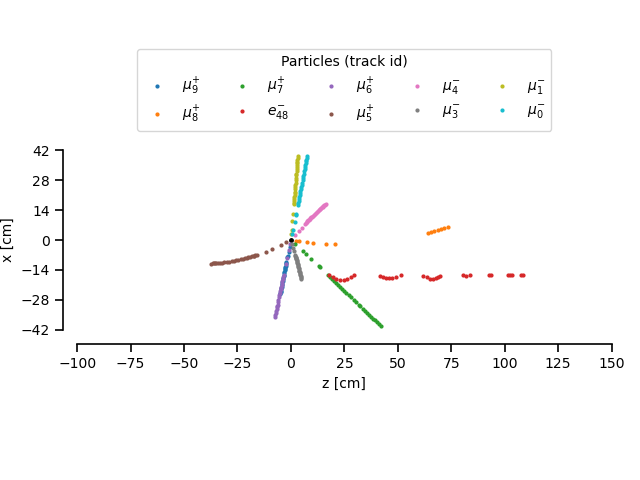

In [74]:
plt.close()

eventNumber = 0

# get the PDG IDs of the MCTracks
mcTrack_pdgId = mcPoint_params["MCTrack.fPdgCode"].array(library="np")[eventNumber]

# get x,y & z coordinates of the STT & MVD MC points
stt_x = mcPoint_params["STTPoint.fX"].array(library="np")[eventNumber]
stt_z = mcPoint_params["STTPoint.fZ"].array(library="np")[eventNumber]
stt_trackIDs = mcPoint_params["STTPoint.fTrackID"].array(library="np")[eventNumber]

mvd_x = mcPoint_params["MVDPoint.fX"].array(library="np")[eventNumber]
mvd_z = mcPoint_params["MVDPoint.fZ"].array(library="np")[eventNumber]
mvd_trackIDs = mcPoint_params["MVDPoint.fTrackID"].array(library="np")[eventNumber]

# define dictionaries with the trackID as the key and arrays with x and y coordinates as the values
xPointsPerTrack = {}
zPointsPerTrack = {}

# Iterate over all track IDs in the STT volume
point = 0
for trackID in stt_trackIDs:
	if trackID not in xPointsPerTrack:
		xPointsPerTrack[trackID] = []
		zPointsPerTrack[trackID] = []
	xPointsPerTrack[trackID].append(stt_x[point])
	zPointsPerTrack[trackID].append(stt_z[point])
	point += 1

# Iterate over all track IDs in the MVD volume
point = 0
for trackID in mvd_trackIDs:
	if trackID not in xPointsPerTrack:
		xPointsPerTrack[trackID] = []
		zPointsPerTrack[trackID] = []
	xPointsPerTrack[trackID].append(mvd_x[point])
	zPointsPerTrack[trackID].append(mvd_z[point])
	point += 1

fig = plt.figure()
ax = fig.add_subplot()

# Plot the IP
plt.plot(0,0,marker='.',ms=5, color='black')

for trackID in xPointsPerTrack:
	if mcTrack_pdgId[trackID] == 13:
		trackLabel = r'$\mu^{-}_{'+ str(trackID) +r'}$'
	elif mcTrack_pdgId[trackID] == -13:
		trackLabel = r'$\mu^{+}_{'+ str(trackID) +r'}$'
	elif mcTrack_pdgId[trackID] == 11:
		trackLabel = r'$e^{-}_{'+ str(trackID) +r'}$'
	elif mcTrack_pdgId[trackID] == -11:
		trackLabel = r'$e^{+}_{'+ str(trackID) +r'}$'
	else:
		trackLabel = "PDG ID: " + str(mcTrack_pdgId[trackID])
	plt.plot(zPointsPerTrack[trackID],xPointsPerTrack[trackID],marker='.',ms=4,ls="",label=trackLabel)

# Set the axis labels and limits
plt.xlabel("z [cm]")
plt.xlim(-100, 150)
plt.ylabel("x [cm]")
plt.ylim(-42, 42)

# Set the ticks positions to match the data range
x_ticks = np.linspace(-100, 150, num=11)
y_ticks = np.linspace(-42, 42, num=7)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.tick_params(length=6,width=1.2)

# Set the aspect ratio to be equal
plt.gca().set_aspect('equal')

fig.tight_layout()	

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

plt.legend(title="Particles (track id)",loc="upper center",ncols=len(xPointsPerTrack)/2,bbox_to_anchor=(0.5,1.6))

imgPath = imagePath + "/sim/" + projectName + "_xzTracks"

print("Saving png image to: ", imgPath+".png")
plt.savefig(imgPath+".png", dpi=300, bbox_inches='tight')

print("Saving pdf image to: ", imgPath+".pdf")
plt.savefig(imgPath+".pdf", dpi=300, bbox_inches='tight')

#### yz-projection with different colors for different tracks

Saving png image to:  /mnt/c/Users/nikol/sciebo/Doktor/Pictures/simulation-visualization/sim/mum5mup5_yzTracks.png
Saving pdf image to:  /mnt/c/Users/nikol/sciebo/Doktor/Pictures/simulation-visualization/sim/mum5mup5_yzTracks.pdf


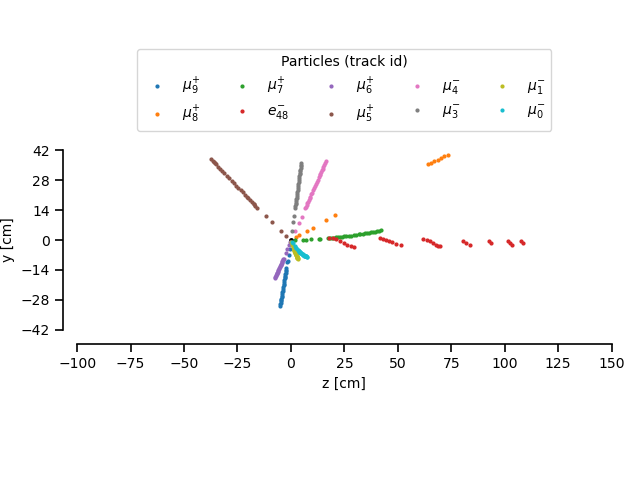

In [80]:
plt.close()

eventNumber = 0

# get the PDG IDs of the MCTracks
mcTrack_pdgId = mcPoint_params["MCTrack.fPdgCode"].array(library="np")[eventNumber]

# get x,y & z coordinates of the STT & MVD MC points
stt_y = mcPoint_params["STTPoint.fY"].array(library="np")[eventNumber]
stt_z = mcPoint_params["STTPoint.fZ"].array(library="np")[eventNumber]
stt_trackIDs = mcPoint_params["STTPoint.fTrackID"].array(library="np")[eventNumber]

mvd_y = mcPoint_params["MVDPoint.fY"].array(library="np")[eventNumber]
mvd_z = mcPoint_params["MVDPoint.fZ"].array(library="np")[eventNumber]
mvd_trackIDs = mcPoint_params["MVDPoint.fTrackID"].array(library="np")[eventNumber]

# define dictionaries with the trackID as the key and arrays with x and y coordinates as the values
yPointsPerTrack = {}
zPointsPerTrack = {}

# Iterate over all track IDs in the STT volume
point = 0
for trackID in stt_trackIDs:
	if trackID not in yPointsPerTrack:
		yPointsPerTrack[trackID] = []
		zPointsPerTrack[trackID] = []
	yPointsPerTrack[trackID].append(stt_y[point])
	zPointsPerTrack[trackID].append(stt_z[point])
	point += 1

# Iterate over all track IDs in the MVD volume
point = 0
for trackID in mvd_trackIDs:
	if trackID not in yPointsPerTrack:
		yPointsPerTrack[trackID] = []
		zPointsPerTrack[trackID] = []
	yPointsPerTrack[trackID].append(mvd_y[point])
	zPointsPerTrack[trackID].append(mvd_z[point])
	point += 1

fig = plt.figure()
ax = fig.add_subplot()

# Plot the IP
plt.plot(0,0,marker='.',ms=5, color='black')

for trackID in yPointsPerTrack:
	if mcTrack_pdgId[trackID] == 13:
		trackLabel = r'$\mu^{-}_{'+ str(trackID) +r'}$'
	elif mcTrack_pdgId[trackID] == -13:
		trackLabel = r'$\mu^{+}_{'+ str(trackID) +r'}$'
	elif mcTrack_pdgId[trackID] == 11:
		trackLabel = r'$e^{-}_{'+ str(trackID) +r'}$'
	elif mcTrack_pdgId[trackID] == -11:
		trackLabel = r'$e^{+}_{'+ str(trackID) +r'}$'
	else:
		trackLabel = "PDG ID: " + str(mcTrack_pdgId[trackID])
	plt.plot(zPointsPerTrack[trackID],yPointsPerTrack[trackID],marker='.',ms=4,ls="",label=trackLabel)

# Set the axis labels and limits
plt.xlabel("z [cm]")
plt.xlim(-100, 150)
plt.ylabel("y [cm]")
plt.ylim(-42, 42)

# Set the ticks positions to match the data range
x_ticks = np.linspace(-100, 150, num=11)
y_ticks = np.linspace(-42, 42, num=7)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.tick_params(length=6,width=1.2)

# Set the aspect ratio to be equal
plt.gca().set_aspect('equal')

fig.tight_layout()	

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

plt.legend(title="Particles (track id)",loc="upper center",ncols=len(xPointsPerTrack)/2,bbox_to_anchor=(0.5,1.6))

imgPath = imagePath + "/sim/" + projectName + "_yzTracks"

print("Saving png image to: ", imgPath+".png")
plt.savefig(imgPath+".png", dpi=300, bbox_inches='tight')

print("Saving pdf image to: ", imgPath+".pdf")
plt.savefig(imgPath+".pdf", dpi=300, bbox_inches='tight')

#### 3D scatter plot with different colors indicating different tracks

Saving png image to:  /mnt/c/Users/nikol/sciebo/Doktor/Pictures/simulation-visualization/sim/mum5mup5_yzTracks.png
Saving pdf image to:  /mnt/c/Users/nikol/sciebo/Doktor/Pictures/simulation-visualization/sim/mum5mup5_yzTracks.pdf


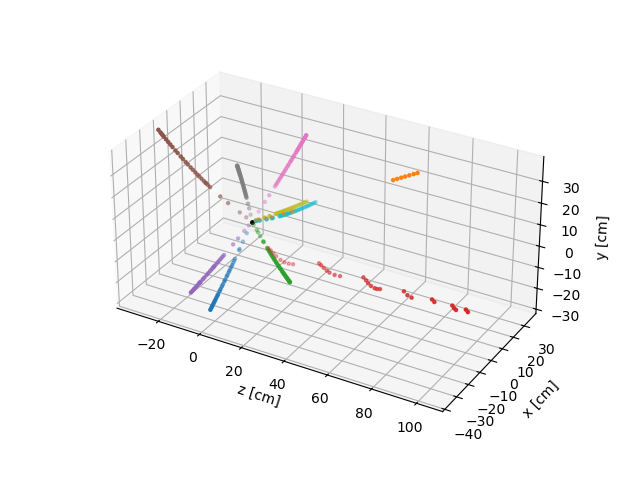

In [91]:
plt.close()

eventNumber = 0

# get the PDG IDs of the MCTracks
mcTrack_pdgId = mcPoint_params["MCTrack.fPdgCode"].array(library="np")[eventNumber]

# get x,y & z coordinates of the STT & MVD MC points
stt_x = mcPoint_params["STTPoint.fX"].array(library="np")[eventNumber]
stt_y = mcPoint_params["STTPoint.fY"].array(library="np")[eventNumber]
stt_z = mcPoint_params["STTPoint.fZ"].array(library="np")[eventNumber]
stt_trackIDs = mcPoint_params["STTPoint.fTrackID"].array(library="np")[eventNumber]

mvd_x = mcPoint_params["MVDPoint.fX"].array(library="np")[eventNumber]
mvd_y = mcPoint_params["MVDPoint.fY"].array(library="np")[eventNumber]
mvd_z = mcPoint_params["MVDPoint.fZ"].array(library="np")[eventNumber]
mvd_trackIDs = mcPoint_params["MVDPoint.fTrackID"].array(library="np")[eventNumber]

# define dictionaries with the trackID as the key and arrays with x and y coordinates as the values
xPointsPerTrack = {}
yPointsPerTrack = {}
zPointsPerTrack = {}

# Iterate over all track IDs in the STT volume
point = 0
for trackID in stt_trackIDs:
	if trackID not in yPointsPerTrack:
		xPointsPerTrack[trackID] = []
		yPointsPerTrack[trackID] = []
		zPointsPerTrack[trackID] = []
	xPointsPerTrack[trackID].append(stt_x[point])
	yPointsPerTrack[trackID].append(stt_y[point])
	zPointsPerTrack[trackID].append(stt_z[point])
	point += 1

# Iterate over all track IDs in the MVD volume
point = 0
for trackID in mvd_trackIDs:
	if trackID not in yPointsPerTrack:
		xPointsPerTrack[trackID] = []
		yPointsPerTrack[trackID] = []
		zPointsPerTrack[trackID] = []
	xPointsPerTrack[trackID].append(mvd_x[point])	
	yPointsPerTrack[trackID].append(mvd_y[point])
	zPointsPerTrack[trackID].append(mvd_z[point])
	point += 1

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# Plot the IP
plt.plot(0,0,marker='.',ms=5, color='black')

for trackID in yPointsPerTrack:
	if mcTrack_pdgId[trackID] == 13:
		trackLabel = r'$\mu^{-}_{'+ str(trackID) +r'}$'
	elif mcTrack_pdgId[trackID] == -13:
		trackLabel = r'$\mu^{+}_{'+ str(trackID) +r'}$'
	elif mcTrack_pdgId[trackID] == 11:
		trackLabel = r'$e^{-}_{'+ str(trackID) +r'}$'
	elif mcTrack_pdgId[trackID] == -11:
		trackLabel = r'$e^{+}_{'+ str(trackID) +r'}$'
	else:
		trackLabel = "PDG ID: " + str(mcTrack_pdgId[trackID])
	ax.scatter(zPointsPerTrack[trackID],xPointsPerTrack[trackID],yPointsPerTrack[trackID],marker='.',label=trackLabel)

# Set the axis labels and limits
xCoords = np.concatenate((stt_x, mvd_x))
yCoords = np.concatenate((stt_y, mvd_y))
zCoords = np.concatenate((stt_z, mvd_z))

min_x = np.min(xCoords)
max_x = np.max(xCoords)
min_y = np.min(yCoords)
max_y = np.max(yCoords)
min_z = np.min(zCoords)
max_z = np.max(zCoords)

plt.xlabel("z [cm]")
plt.xlim(min_z, max_z)
plt.ylabel("x [cm]")
plt.ylim(min_x, max_x)
ax.set_zlabel("y [cm]")
ax.set_zlim(min_y, max_y)

# Set the aspect ratio to be equal
plt.gca().set_aspect('equal')

fig.tight_layout()	

#plt.legend(title="Particles (track id)")

imgPath = imagePath + "/sim/" + projectName + "_yzTracks"

print("Saving png image to: ", imgPath+".png")
plt.savefig(imgPath+".png", dpi=300, bbox_inches='tight')

print("Saving pdf image to: ", imgPath+".pdf")
plt.savefig(imgPath+".pdf", dpi=300, bbox_inches='tight')

#### xy-projection with arrows indicating the momentum direction and magnetude and colors indicating the track

In [ ]:
eventNumber = 0

# get x,y coordinates of the STT & MVD MC points
stt_x = mcPoint_params["STTPoint.fX"].array(library="np")[eventNumber]
stt_y = mcPoint_params["STTPoint.fY"].array(library="np")[eventNumber]
stt_z = mcPoint_params["STTPoint.fZ"].array(library="np")[eventNumber]


sstPx = mcPoint_params["STTPoint.fPx"].array(library="np")[eventNumber]
sstPy = mcPoint_params["STTPoint.fPy"].array(library="np")[eventNumber]
sstAbsP = np.sqrt(sstPx**2 + sstPy**2)
sstPxNorm = sstPx/sstAbsP
sstPyNorm = sstPy/sstAbsP

mvdX = mcPoint_params["MVDPoint.fX"].array(library="np")[eventNumber]
mvdY = mcPoint_params["MVDPoint.fY"].array(library="np")[eventNumber]
mvdPx = mcPoint_params["MVDPoint.fPx"].array(library="np")[eventNumber]
mvdPy = mcPoint_params["MVDPoint.fPy"].array(library="np")[eventNumber]
mvdAbsP = np.sqrt(mvdPx**2 + mvdPy**2)
mvdPxNorm = mvdPx/mvdAbsP
mvdPyNorm = mvdPy/mvdAbsP

fig = plt.figure()
ax = plt.subplot()
ax.quiver(stt_x,stt_y,sstPxNorm,sstPyNorm,sstAbsP,angles='xy',scale_units='xy',scale=1,width=0.01,pivot="mid")
# ax.scatter(sstX,sstY,marker=".",color="black",s=1)
ax.quiver(mvdX,mvdY,mvdPxNorm,mvdPyNorm,mvdAbsP,angles='xy',scale_units='xy',scale=1,width=0.01,pivot="mid")

mvdRadii = [2.5,13.5]
for radius in mvdRadii:
	circle = patches.Circle((0,0), radius=radius, color='black', fill=False)
	ax.add_patch(circle)

sttInner = patches.Circle((0,0), radius=16.0, color='black', fill=False)
ax.add_patch(sttInner)

sstOuter = patches.Circle((0,0), radius=41.0, color='black', fill=False)
ax.add_patch(sstOuter)


ax.plot(0,0,"black",marker=".")
ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")
ax.set_xlim(-42,42)
ax.set_ylim(-42,42)
ax.set_aspect('equal', adjustable='box')

sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=sstAbsP.min(), vmax=sstAbsP.max()))
sm.set_array([])  # Dummy array for the color bar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Absolute Momentum [GeV]')

fig.dpi = 300
plt.show()

### Parameters included in the digitized root file for the straw tube detector:

(pos and mom are given in x, y, and z coordinates in the lab frame)
- <pre> detID		: Detector unique volume ID </pre>
- <pre> tubeID		: Unique tube ID </pre>
- <pre> mcindex	: Index of corresponding MCPoint </pre>
- <pre> pos		: Position coordinates of the tube [cm] </pre>
- <pre> dpos		: Errors in position coordinates [cm] </pre>
- <pre> isochrone	: The radial measurement </pre>
- <pre> isoerror	: The erroon on the radial measurement </pre>
- <pre> chDep		: Deposited charge (arbitrary unit)  </pre>

In [ ]:
# Import the exact positions and momenta of the muons inside on of the tubes of the straw tube detector
stt_digi_params 	= uproot.open("/home/n_idw/simFiles/root/mum2mup2_digi.root:pndsim/STTHit") # path to the branch in the root file
stt_digi_coords 	= stt_digi_params.arrays(["STTHit.fX"  , "STTHit.fY"  , "STTHit.fZ" ]) # extract the x, y, z hit coordinates of the muons in the STT
stt_digi_coords_err = stt_digi_params.arrays(["STTHit.fDx" , "STTHit.fDy" , "STTHit.fDz" ]) # extract the errors of the x, y, z hit coordinates of the muons in the STT

### Parameters included in the digitized root file for the MVD detector:

(In the code they are members of the class PndSdsHit)

(In the MC file hits are divided into pixel hits and strip hits)

(pos and mom are given in x, y, and z coordinates in the lab frame)
<pre> - detID	: Detector ID </pre>
<pre> - sensorID	: Sensor ID </pre>
<pre> - pos		: Position vector [cm] </pre>
<pre> - dpos		: Position error vector [cm] </pre>
<pre> - index	: Array index of ClusterCand </pre>
<pre> - charge	: Charge measured in hit </pre>
<pre> - NDigiHits	: Number of pixels fired for this event  </pre>
(it seems parameters are missing here that are in the root file!)

In [ ]:
# Import the hit positions and their respective errors in the MVD pixels
mvdPixel_digi_params 	= uproot.open("/home/n_idw/simFiles/root/mum2mup2_digi.root:pndsim/MVDHitsPixel") # path to the branch in the root file
mvdPixel_digi_coords 	= mvdPixel_digi_params.arrays(["MVDHitsPixel.fX" , "MVDHitsPixel.fY" , "MVDHitsPixel.fZ" ]) # extract the x, y, z hit coordinates in the MVD pixel detectors
mvdPixel_digi_coords_err= mvdPixel_digi_params.arrays(["MVDHitsPixel.fDx", "MVDHitsPixel.fDy", "MVDHitsPixel.fDz"]) # extract the errors of the x, y, z hit components  

# Import the hit positions and their respective errors in the MVD strips
mvdStrip_digi_params 	= uproot.open("/home/n_idw/simFiles/root/mum2mup2_digi.root:pndsim/MVDHitsStrip") # path to the branch in the root file
mvdStrip_digi_coords 	= mvdStrip_digi_params.arrays(["MVDHitsStrip.fX" , "MVDHitsStrip.fY" , "MVDHitsStrip.fZ" ]) # extract the x, y, z hit coordinates in the MVD strip detectors
mvdStrip_digi_coords_err= mvdStrip_digi_params.arrays(["MVDHitsStrip.fDx", "MVDHitsStrip.fDy", "MVDHitsStrip.fDz"]) # extract the errors of the x, y, z hit components

## Plot 2D Projections of the MC Points in the MVD and STT

In [ ]:
eventNumber = 3

sstX = np.array(stt_sim_coords["STTPoint.fX",eventNumber])
sstY = np.array(stt_sim_coords["STTPoint.fY",eventNumber])
sstPx = np.array(stt_sim_mom["STTPoint.fPx",eventNumber])
sstPy = np.array(stt_sim_mom["STTPoint.fPy",eventNumber])
sstAbsP = np.sqrt(sstPx**2 + sstPy**2)
sstPxNorm = sstPx/sstAbsP
sstPyNorm = sstPy/sstAbsP

mvdX = np.array(mvd_sim_coords["MVDPoint.fX",eventNumber])
mvdY = np.array(mvd_sim_coords["MVDPoint.fY",eventNumber])
mvdPx = np.array(mvd_sim_mom["MVDPoint.fPx",eventNumber])
mvdPy = np.array(mvd_sim_mom["MVDPoint.fPy",eventNumber])
mvdAbsP = np.sqrt(mvdPx**2 + mvdPy**2)
mvdPxNorm = mvdPx/mvdAbsP
mvdPyNorm = mvdPy/mvdAbsP

fig = plt.figure()
ax = plt.subplot()
ax.quiver(sstX,sstY,sstPxNorm,sstPyNorm,sstAbsP,angles='xy',scale_units='xy',scale=1,width=0.01,pivot="mid")
# ax.scatter(sstX,sstY,marker=".",color="black",s=1)
ax.quiver(mvdX,mvdY,mvdPxNorm,mvdPyNorm,mvdAbsP,angles='xy',scale_units='xy',scale=1,width=0.01,pivot="mid")

mvdRadii = [2.5,13.5]
for radius in mvdRadii:
	circle = patches.Circle((0,0), radius=radius, color='black', fill=False)
	ax.add_patch(circle)

sttInner = patches.Circle((0,0), radius=16.0, color='black', fill=False)
ax.add_patch(sttInner)

sstOuter = patches.Circle((0,0), radius=41.0, color='black', fill=False)
ax.add_patch(sstOuter)


ax.plot(0,0,"black",marker=".")
ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")
ax.set_xlim(-42,42)
ax.set_ylim(-42,42)
ax.set_aspect('equal', adjustable='box')

sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=sstAbsP.min(), vmax=sstAbsP.max()))
sm.set_array([])  # Dummy array for the color bar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Absolute Momentum [GeV]')

plt.show()

In [ ]:
eventNumber=0
X = np.array(stt_sim_coords["STTPoint.fX",eventNumber])
Y = np.array(stt_sim_coords["STTPoint.fY",eventNumber])
U = np.array(stt_sim_mom["STTPoint.fPx",eventNumber])
V = np.array(stt_sim_mom["STTPoint.fPy",eventNumber])

fig1, ax1 = plt.subplots()
Q = ax1.quiver(X,Y,U,V)
plt.show()

In [ ]:
eventNumber = 5
fig = plt.figure()
ax = plt.subplot()
ax.scatter(stt_digi_coords["STTHit.fX",eventNumber],stt_digi_coords["STTHit.fY" ,eventNumber],marker=".")

x = stt_digi_coords["STTHit.fX",eventNumber]
y = stt_digi_coords["STTHit.fY",eventNumber]
xerr = stt_digi_coords_err["STTHit.fDx",eventNumber]
yerr = stt_digi_coords_err["STTHit.fDy",eventNumber]

# Add ellipses representing the error margins
for (xi, yi, xe, ye) in zip(x, y, xerr, yerr):
    ellipse = patches.Ellipse((xi, yi), width=2*xe, height=2*ye, edgecolor='red', facecolor='red', alpha=0.3)
    ax.add_patch(ellipse)
    
ax.scatter(mvdPixel_digi_coords["MVDHitsPixel.fX",eventNumber],mvdPixel_digi_coords["MVDHitsPixel.fY",eventNumber],marker=".")
ax.scatter(mvdStrip_digi_coords["MVDHitsStrip.fX",eventNumber],mvdStrip_digi_coords["MVDHitsStrip.fY",eventNumber],marker=".")

mvdRadii = [2.5,13.5]
for radius in mvdRadii:
	circle = patches.Circle((0,0), radius=radius, color='black', fill=False)
	ax.add_patch(circle)

sttInner = patches.Circle((0,0), radius=16.0, color='black', fill=False)
ax.add_patch(sttInner)

sstOuter = patches.Circle((0,0), radius=41.0, color='black', fill=False)
ax.add_patch(sstOuter)


ax.plot(0,0,"black",marker=".")
ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")
ax.set_xlim(-42,42)
ax.set_ylim(-42,42)
ax.set_aspect('equal', adjustable='box')
plt.show()

## 3D Visualization of the MC Points in the MVD and STT

In [ ]:
eventNumber = 5

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stt_sim_coords["STTPoint.fX",eventNumber], stt_sim_coords["STTPoint.fY",eventNumber], stt_sim_coords["STTPoint.fZ",eventNumber])
ax.scatter(mvd_sim_coords["MVDPoint.fX",eventNumber], mvd_sim_coords["MVDPoint.fY",eventNumber], mvd_sim_coords["MVDPoint.fZ",eventNumber])
ax.plot([0,0],[0,0],[0,0],marker="o",color="black")
ax.set_xlim(-42,42)
ax.set_ylim(-42,42)
ax.set_zlim(-75,75)
ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")
ax.set_zlabel("z [cm]")
plt.show()